In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_data

%matplotlib inline

## detroit-311.csv

In [2]:
data_311 = pd.read_csv('../data/detroit-311.csv')

In [3]:
data_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19680 entries, 0 to 19679
Data columns (total 15 columns):
ticket_id                        19680 non-null int64
city                             19680 non-null object
issue_type                       19680 non-null object
ticket_status                    19680 non-null object
issue_description                15216 non-null object
rating                           19680 non-null int64
ticket_closed_date_time          16505 non-null object
acknowledged_at                  17657 non-null object
ticket_created_date_time         19680 non-null object
ticket_last_updated_date_time    19680 non-null object
address                          19680 non-null object
lat                              19680 non-null float64
lng                              19680 non-null float64
location                         19680 non-null object
image                            4102 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 2.3+ MB


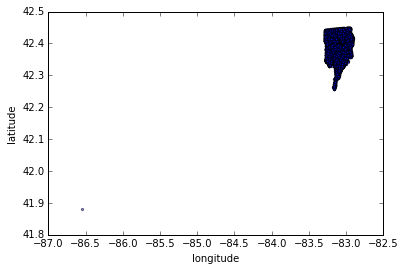

In [4]:
fig, ax = plt.subplots(1)
ax.scatter(data_311['lng'],data_311['lat'],s=5,alpha=0.5)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

In [5]:
# To remove outliers
data_311 = data_311[(data_311['lng']>-84.0) & (data_311['lat']>42.0)]

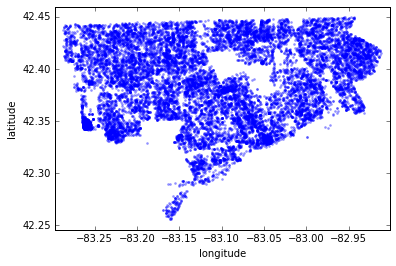

In [6]:
fig, ax = plt.subplots(1)
ax.scatter(data_311['lng'],data_311['lat'],s=3,color='blue',alpha=0.3)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(min(data_311['lng'])-0.01, max(data_311['lng'])+0.01)
ax.set_ylim(min(data_311['lat'])-0.01, max(data_311['lat'])+0.01)
plt.show()

In [7]:
data_311['addr'] = data_311['address'].astype(str).apply(lambda x: x.lower())

In [8]:
data_311.drop(['city','location','image'],axis=1,inplace=True)

### Clean address

In [9]:
import re

In [10]:
def clean_addr(addr):
    '''remove city, state, country, or zip from an address. Make street, avenue, and drive
    in short forms (st, ave, dr)'''
    
    addr = re.sub('4\d{4}$','',addr)
    addr = re.sub('4\d{4}, usa$','',addr)
    addr = re.sub('detroit, mi.?\s?$','',addr)
    addr = re.sub('detroit mi.?\s?$','',addr)
    addr = re.sub('detroit, michigan\s?$','',addr)
    addr = re.sub('detroit michigan\s?$','',addr)
    addr = re.sub('michigan\s?$','',addr)
    
    addr = re.sub(' street ',' st ', addr)
    addr = re.sub(' st. ',' st ', addr)
    addr = re.sub(' drive ', ' dr ', addr)
    addr = re.sub(' dr. ', ' dr ', addr)
    addr = re.sub(' ave.',' ave', addr)
    addr = re.sub('\s?,', '', addr)
    addr = re.sub('\.', '', addr)
    addr = addr.rstrip()
    return addr

In [11]:
data_311['addr'] = data_311['addr'].apply(lambda x: clean_addr(x))

### Give each instance a unique event_id and a '_type_' ranging from 1 to 3 indicating if a '311 call', a 'crime', or a 'blight violation'.

In [12]:
event_beg = 0
event_end = data_311.shape[0]
data_311['event_id'] = np.arange(event_beg,event_end)
data_311['type'] = 1

In [13]:
data_311.to_csv('../data/data_311.csv', index=False)

## detroit-crime.csv

In [14]:
data_crime = pd.read_csv("../data/detroit-crime.csv")

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
data_crime.columns

Index(['ROWNUM', 'CASEID', 'INCINO', 'CATEGORY', 'OFFENSEDESCRIPTION',
       'STATEOFFENSEFILECLASS', 'INCIDENTDATE', 'HOUR', 'SCA', 'PRECINCT',
       'COUNCIL', 'NEIGHBORHOOD', 'CENSUSTRACT', 'ADDRESS', 'LON', 'LAT',
       'LOCATION'],
      dtype='object')

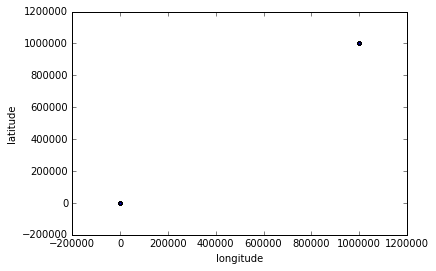

In [16]:
fig, ax = plt.subplots(1)
ax.scatter(data_crime['LON'],data_crime['LAT'],s=5,alpha=0.5)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

In [17]:
# To remove outliers
data_crime = data_crime[(data_crime['LON']>-83.3) & (data_crime['LON']<-82.7) &
                        (data_crime['LAT']>42.25) &  (data_crime['LAT']<42.46)]

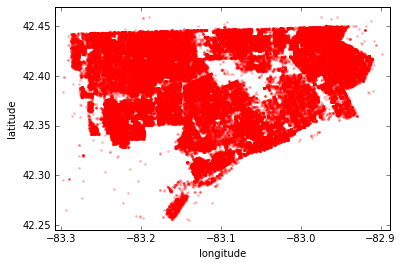

In [18]:
fig, ax = plt.subplots(1)
ax.scatter(data_crime['LON'],data_crime['LAT'],s=3,color='red',alpha=0.2)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(min(data_crime['LON'])-0.01,max(data_crime['LON']+0.01))
ax.set_ylim(min(data_crime['LAT'])-0.01,max(data_crime['LAT']+0.01))
plt.show()

In [19]:
def clean_crime_addr(addr):
    '''lower case'''
    addr = addr.lower()
    return addr

In [20]:
data_crime['addr'] = data_crime['ADDRESS'].astype(str).apply(lambda x: clean_crime_addr(x))

In [21]:
data_crime.drop(['ADDRESS'],axis=1,inplace=True)

In [22]:
event_beg = event_end
event_end += data_crime.shape[0]
data_crime['event_id'] = np.arange(event_beg,event_end)
data_crime['type'] = 2

In [23]:
data_crime.to_csv('../data/data_crime.csv', index=False)

## detroit-blight-violations.csv

In [24]:
data_bv = pd.read_csv("../data/detroit-blight-violations.csv")

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
data_bv.columns

Index(['TicketID', 'TicketNumber', 'AgencyName', 'ViolName',
       'ViolationStreetNumber', 'ViolationStreetName', 'MailingStreetNumber',
       'MailingStreetName', 'MailingCity', 'MailingState', 'MailingZipCode',
       'NonUsAddressCode', 'Country', 'TicketIssuedDT', 'TicketIssuedTime',
       'HearingDT', 'CourtTime', 'ViolationCode', 'ViolDescription',
       'Disposition', 'FineAmt', 'AdminFee', 'LateFee', 'StateFee',
       'CleanUpCost', 'JudgmentAmt', 'PaymentStatus', 'Void',
       'ViolationCategory', 'ViolationAddress', 'MailingAddress'],
      dtype='object')

In [26]:
data_bv['ViolationAddress'][0]

'2566 GRAND BLVD\nDetroit, MI\n(42.36318237000006, -83.09167672099994)'

In [27]:
vlocs = data_bv['ViolationAddress'].astype(str)
vcoords = vlocs.apply(lambda x : x.split('\n')[-1])
vaddr = vlocs.apply(lambda x : x.split('\n')[0].lower())
vcoords = vcoords.apply(lambda x : x.rstrip(')').lstrip('('))
data_bv['coord'] = vcoords.astype(str)
data_bv['addr'] = vaddr.astype(str)
data_bv = data_bv[data_bv['coord']!='']
data_bv['lon'] = data_bv['coord'].apply(lambda x: x.split(', ')[-1])
data_bv['lat'] = data_bv['coord'].apply(lambda x: x.split(', ')[0])
data_bv['lon'] = data_bv['lon'].astype(float)
data_bv['lat'] = data_bv['lat'].astype(float)

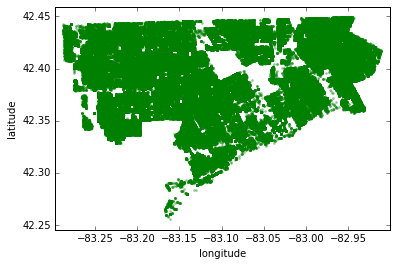

In [28]:
fig, ax = plt.subplots(1)
ax.scatter(data_bv['lon'],data_bv['lat'],s=3,color='green',alpha=0.3)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_xlim(min(data_bv['lon'])-0.01, max(data_bv['lon'])+0.01)
ax.set_ylim(min(data_bv['lat'])-0.01, max(data_bv['lat'])+0.01)
plt.show()

In [29]:
event_beg = event_end
event_end += data_bv.shape[0]
data_bv['event_id'] = np.arange(event_beg,event_end)
data_bv['type'] = 3

In [30]:
data_bv.to_csv('../data/data_bv.csv',index=False)

## Events Table

In [31]:
events_collection = [data_311.as_matrix(['event_id','lng','lat','addr','type']),
                    data_crime.as_matrix(['event_id', 'LON', 'LAT', 'addr','type']),
                    data_bv.as_matrix(['event_id','lon','lat','addr','type'])]
events = pd.DataFrame(data=np.concatenate(events_collection), 
                      columns=['event_id','lon','lat','addr','type'])

In [32]:
events.shape

(446877, 5)

In [33]:
events.head()

,event_id,lon,lat,addr,type
0,0,-83.161,42.384,13120-13130 ilene st,1
1,1,-83.0809,42.4405,1485 e outer dr,1
2,2,-82.962,42.4452,15460 eastburn,1
3,3,-83.1662,42.421,17541 mendota st,1
4,4,-83.1629,42.402,griggs,1


In [42]:
events.to_csv('../data/events.csv',index=False)

## detroit-demolition-permits.tsv

In [34]:
permits = pd.read_csv('../data/detroit-demolition-permits.tsv',delimiter="\t")

In [35]:
plocs = permits['site_location'].astype(str)
pcoords = plocs.apply(lambda x : x.split('\n')[-1])
paddr = plocs.apply(lambda x : x.split('\n')[0].lower())
pcoords = pcoords.apply(lambda x : x.rstrip(')').lstrip('('))
permits['coord'] = pcoords.astype(str)
permits['addr'] = paddr.astype(str)
permits = permits[permits['coord']!='']
permits['lon'] = permits['coord'].apply(lambda x: x.split(', ')[-1])
permits['lat'] = permits['coord'].apply(lambda x: x.split(', ')[0])
permits['lon'] = permits['lon'].astype(float)
permits['lat'] = permits['lat'].astype(float)

In [36]:
permits.drop(['coord','site_location'],axis=1,inplace=True)

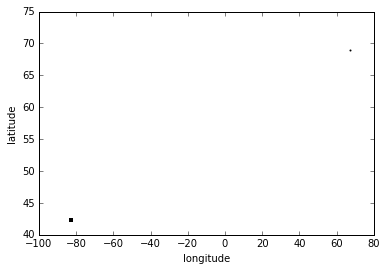

In [37]:
fig, ax = plt.subplots(1)
ax.scatter(permits['lon'],permits['lat'],s=1)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.show()

Detroit coordinates are centered at lower left corner in the above figure. We can get rid of outliers with way different coordiantes.

In [38]:
permits = permits[(permits['lon']<-70) & (permits['lat'] < 45)]

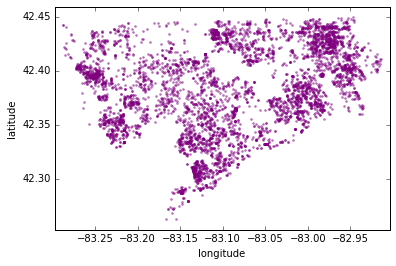

In [39]:
fig, ax = plt.subplots(1)
ax.scatter(permits['lon'],permits['lat'],s=3,color='purple',alpha=0.4)
ax.set_xlabel('longitude')
ax.set_xlim(min(permits['lon'])-0.01,max(permits['lon']+0.01))
ax.set_ylabel('latitude')
ax.set_ylim(min(permits['lat'])-0.01,max(permits['lat']+0.01))
plt.show()

In [40]:
permits['PARCEL_NO'] = permits['PARCEL_NO'].apply(lambda x: x.replace(" ",""))

In [41]:
permits.to_csv('../data/permits.csv', index=False)